# Hierarchical clustering from scratch avec Python

## Importation des packages

In [1]:
import numpy as np

import matplotlib.pyplot as plt

## Création du jeu de données

In [2]:
np.random.seed(123)

mu, sigma = 2, 5 # mean and standard deviation
x_train_1_1 = np.random.normal(mu, sigma, 100)
mu, sigma = 5, 1 # mean and standard deviation
x_train_1_2 = np.random.normal(mu, sigma, 100)

mu, sigma = 5, 3 # mean and standard deviation
x_train_2_1 = np.random.normal(mu, sigma, 100)
mu, sigma = 20, 1 # mean and standard deviation
x_train_2_2 = np.random.normal(mu, sigma, 100)

mu, sigma = 22, 2.5 # mean and standard deviation
x_train_3_1 = np.random.normal(mu, sigma, 100)
mu, sigma = 10, 8 # mean and standard deviation
x_train_3_2 = np.random.normal(mu, sigma, 100)

x_train = np.stack([np.concatenate([x_train_1_1, x_train_2_1, x_train_3_1]),
                    np.concatenate([x_train_1_2, x_train_2_2, x_train_3_2])], axis=1)

np.random.shuffle(x_train)

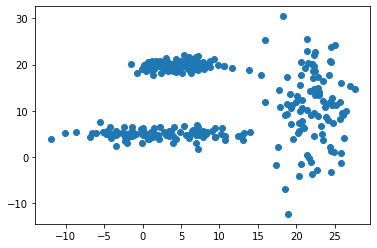

In [3]:
plt.scatter(x_train[:, 0], x_train[:, 1])
plt.show()

## Implémentation du hierarchical clustering

### Initialisation de la classe

In [4]:
class HierarchicalClustering:

  def __init__(self, k: int) -> None:
    ''' Fonction d'initialisation '''
    self.k = k

In [5]:
agglo = HierarchicalClustering(3)

print(agglo.k)

3


### Calcul des distances : Distance Euclidienne

$$
d(a,b) = \sqrt {\sum ^n_{i=1} (a_i - b_i)^2}
$$


$a$ et $b$ sont deux points dans un plan euclidien de dimension $n$

$a_i$ et $b_i$ sont deux vecteurs depuis l'origine jusqu'au point $a$, $b$.

In [6]:
class HierarchicalClustering:

  def __init__(self, k: int) -> None:
    ''' Initialisation de la fonction '''
    self.k = k

  @staticmethod
  def euclidean_distance(a: np.ndarray, b: np.ndarray) -> np.ndarray:
    ''' Calcul de la distance euclidienne entre les deux vecteurs '''
    return np.sqrt(np.sum(np.power(a-b, 2)))

In [7]:
np.random.seed(123)
a = np.random.random((100, 2))
b = np.random.random((100, 2))

HierarchicalClustering.euclidean_distance(a, b).shape

()

### Initialisation des clusters

In [8]:
class HierarchicalClustering:

  def __init__(self, k: int) -> None:
    ''' Initialisation de la fonction '''
    self.k = k

  @staticmethod
  def euclidean_distance(a: np.ndarray, b: np.ndarray) -> np.ndarray:
    ''' Coalcul de la distance euclidienne entreles deux vecteurs'''
    return np.sqrt(np.sum(np.power(a-b, 2)))

  def init_clusters(self, x: np.ndarray) -> None:
    ''' Initialiser toutes les observations du cluster'''
    self.clusters = {id: np.expand_dims(value, axis=1) for id, value in enumerate(x)}

In [9]:
agglo = HierarchicalClustering(3)

agglo.init_clusters(x_train)

print(x_train.shape)
print("Nombre de clusters : "+str(len(agglo.clusters)))
print(agglo.clusters)

(300, 2)
Nombre de clusters : 300
{0: array([[ 4.98107825],
       [19.85598665]]), 1: array([[19.37445252],
       [11.34977814]]), 2: array([[2.14841615],
       [3.98034493]]), 3: array([[-1.99031368],
       [ 3.12313134]]), 4: array([[ 5.37216769],
       [20.44913561]]), 5: array([[21.75310049],
       [14.39714077]]), 6: array([[ 7.08736196],
       [19.59248741]]), 7: array([[18.84364064],
       [ 9.23477804]]), 8: array([[ 6.24708362],
       [20.24537941]]), 9: array([[11.6021063 ],
       [19.34084869]]), 10: array([[-10.13339622],
       [  5.17954948]]), 11: array([[ 0.44567607],
       [18.69421413]]), 12: array([[ 2.99269212],
       [21.37499063]]), 13: array([[-3.42815302],
       [ 5.64205469]]), 14: array([[22.0510469 ],
       [20.04371458]]), 15: array([[-3.48601523],
       [ 5.07290724]]), 16: array([[3.41813662],
       [4.64599989]]), 17: array([[ 3.20568401],
       [19.17101117]]), 18: array([[ 2.36715924],
       [19.78501696]]), 19: array([[ 7.68817494],
 

### Trouver le cluster le plus proche

In [11]:
class HierarchicalClustering:

  def __init__(self, k: int) -> None:
    ''' Initialisation la fonction '''
    self.k = k

  @staticmethod
  def euclidean_distance(a: np.ndarray, b: np.ndarray) -> np.ndarray:
    ''' Calcul de la distance euclidienne entre les deux vectors '''
    return np.sqrt(np.sum(np.power(a-b, 2)))

  def init_clusters(self, x: np.ndarray) -> None:
    ''' Initialiser toutes les observations du cluster'''
    self.clusters = {id: np.expand_dims(value, axis=1) for id, value in enumerate(x)}

  def find_closest_clusters(self):
    ''' Trouver le plus proche cluster parmi tous les clusters'''

    # Initialize the minimum distance at inf
    min_dist = np.inf

    # Initialize the closest clusters at None
    closest_clusters = None

    # Get the keys of all the clusters
    clusters_ids = list(self.clusters.keys())

    # Go through all the indexes of the dictionnary
    for i, cluster_i in enumerate(clusters_ids):
        # Go though all the indexes of the dictionnary except index i
        for cluster_j in clusters_ids[i+1:]:

            centroid_i = np.mean(self.clusters[cluster_i], axis=1)
            centroid_j = np.mean(self.clusters[cluster_j], axis=1)

            # Compute the distance between cluster_i and j
            dist = HierarchicalClustering.euclidean_distance(centroid_i, centroid_j)

            # If the distance is below the minimum distance
            if dist < min_dist:
                # Update the minimum distance
                min_dist = dist
                # Save the indexes of the closest clusters
                closest_clusters = (cluster_i, cluster_j)

    return closest_clusters

In [12]:
agglo = HierarchicalClustering(3)
agglo.init_clusters(x_train)

closest_clusters = agglo.find_closest_clusters()

print(closest_clusters)
print(agglo.clusters[closest_clusters[0]])
print(agglo.clusters[closest_clusters[1]])

(8, 92)
[[ 6.24708362]
 [20.24537941]]
[[ 6.26053879]
 [20.20692752]]


# Construire un nouveau cluster


In [13]:
class HierarchicalClustering:

  def __init__(self, k: int) -> None:
    ''' Initialisation fonction '''
    self.k = k

  @staticmethod
  def euclidean_distance(a: np.ndarray, b: np.ndarray) -> np.ndarray:
    ''' Calcul de la distance euclidienne entre les deux vectors '''
    return np.sqrt(np.sum(np.power(a-b, 2)))

  def init_clusters(self, x: np.ndarray) -> None:
    '''Initialiser toutes les observations du cluster'''
    self.clusters = {id: np.expand_dims(value, axis=1) for id, value in enumerate(x)}

  def find_closest_clusters(self):
    ''' Trouver le plus proche cluster parmi tous les clusters'''

    # Initialiser la distance minimale à inf
    min_dist = np.inf

    # Initialiser les proches clusters à None
    closest_clusters = None

    # Obtenir les clés de tous les clusters
    clusters_ids = list(self.clusters.keys())

    # Parcourir tous les indices du dictionnaire
    for i, cluster_i in enumerate(clusters_ids):
        # Parcourir tous les indices du dictionnaire à l'exception de l'indice i
        for cluster_j in clusters_ids[i+1:]:

            centroid_i = np.mean(self.clusters[cluster_i], axis=1)
            centroid_j = np.mean(self.clusters[cluster_j], axis=1)

            # Calculer la distance entre cluster_i et j
            dist = HierarchicalClustering.euclidean_distance(centroid_i, centroid_j)

            # Si la disntance est inférieur à la distance minimale
            if dist < min_dist:
                # Mettre à jours la distance minimale
                min_dist = dist
                # Enregistrer l'indice du cluster le plus proche
                closest_clusters = (cluster_i, cluster_j)

    return closest_clusters

  def merge_clusters(self, ci_id, cj_id):
    ''' Merge the two closets clusters into one'''

    # Concaténation des deux clusters
    new_clusters = {0: np.concatenate([self.clusters[ci_id], self.clusters[cj_id]], axis=1)}

    # Creation d'un nouveau dictionnaire
    for cluster_id in self.clusters.keys():
        if (cluster_id != ci_id) and (cluster_id != cj_id):
          new_clusters[len(new_clusters.keys())] = self.clusters[cluster_id]

    return new_clusters

In [14]:
agglo = HierarchicalClustering(3)
agglo.init_clusters(x_train)

closest_clusters = agglo.find_closest_clusters()
clusters = agglo.merge_clusters(*closest_clusters)

print(len(clusters))
print(clusters[0].shape)
print(clusters[0])

299
(2, 2)
[[ 6.24708362  6.26053879]
 [20.24537941 20.20692752]]


# Entraînement de l'algorithme

In [15]:
class HierarchicalClustering:

    def __init__(self, k: int) -> None:
        ''' Fonction d'initialisation '''
        self.k = k

    @staticmethod
    def euclidean_distance(a: np.ndarray, b: np.ndarray) -> np.ndarray:
        ''' Calculer la distance euclidienne entre deux vecteurs '''
        return np.sqrt(np.sum(np.power(a - b, 2)))

    def init_clusters(self, x: np.ndarray) -> None:
        ''' Initialiser chaque observation comme un cluster '''
        self.clusters = {id: np.expand_dims(value, axis=1) for id, value in enumerate(x)}

    def find_closest_clusters(self):
        ''' Trouver les clusters les plus proches parmi tous les clusters '''

        # Initialiser la distance minimale à l'infini
        min_dist = np.inf

        # Initialiser les clusters les plus proches à None
        closest_clusters = None

        # Obtenir les clés de tous les clusters
        clusters_ids = list(self.clusters.keys())

        # Parcourir tous les indices du dictionnaire
        for i, cluster_i in enumerate(clusters_ids):
            # Parcourir tous les indices du dictionnaire sauf l'index i
            for cluster_j in clusters_ids[i+1:]:

                centroid_i = np.mean(self.clusters[cluster_i], axis=1)
                centroid_j = np.mean(self.clusters[cluster_j], axis=1)

                # Calculer la distance entre les clusters i et j
                dist = HierarchicalClustering.euclidean_distance(centroid_i, centroid_j)

                # Si la distance est inférieure à la distance minimale
                if dist < min_dist:
                    # Mettre à jour la distance minimale
                    min_dist = dist
                    # Enregistrer les indices des clusters les plus proches
                    closest_clusters = (cluster_i, cluster_j)

        return closest_clusters

    def merge_clusters(self, ci_id, cj_id):
        ''' Fusionner les deux clusters les plus proches en un seul '''

        # Concaténer les deux clusters
        new_clusters = {0: np.concatenate([self.clusters[ci_id], self.clusters[cj_id]], axis=1)}

        # Créer un nouveau dictionnaire
        for cluster_id in self.clusters.keys():
            if (cluster_id != ci_id) and (cluster_id != cj_id):
                new_clusters[len(new_clusters.keys())] = self.clusters[cluster_id]

        return new_clusters

    def fit(self, x_train: np.ndarray) -> None:
        ''' Trouver les meilleurs k clusters à partir du jeu de données d'entraînement '''
        # Initialisation des clusters
        self.init_clusters(x_train)

        # Tant que le modèle contient plus de clusters que souhaité, l'algorithme continue de les réduire
        while len(self.clusters.keys()) > self.k:
            # Trouver les clusters les plus proches
            closest_clusters = self.find_closest_clusters()
            # Fusionner les deux clusters les plus proches
            self.clusters = self.merge_clusters(*closest_clusters)

In [16]:
agglo = HierarchicalClustering(3)

agglo.fit(x_train)

# Visualisation des clusters

In [17]:
class HierarchicalClustering:

    def __init__(self, k: int) -> None:
        ''' Fonction d'initialisation '''
        self.k = k

    @staticmethod
    def euclidean_distance(a: np.ndarray, b: np.ndarray) -> np.ndarray:
        ''' Calculer la distance euclidienne entre deux vecteurs '''
        return np.sqrt(np.sum(np.power(a - b, 2)))

    def init_clusters(self, x: np.ndarray) -> None:
        ''' Initialiser chaque observation comme un cluster '''
        self.clusters = {id: np.expand_dims(value, axis=1) for id, value in enumerate(x)}

    def find_closest_clusters(self):
        ''' Trouver les clusters les plus proches parmi tous les clusters '''
        # Initialiser la distance minimale à l'infini
        min_dist = np.inf
        # Initialiser les clusters les plus proches à None
        closest_clusters = None
        # Obtenir les clés de tous les clusters
        clusters_ids = list(self.clusters.keys())
        # Parcourir tous les indices du dictionnaire
        for i, cluster_i in enumerate(clusters_ids):
            # Parcourir tous les indices du dictionnaire sauf l'index i
            for cluster_j in clusters_ids[i+1:]:
                centroid_i = np.mean(self.clusters[cluster_i], axis=1)
                centroid_j = np.mean(self.clusters[cluster_j], axis=1)
                # Calculer la distance entre les clusters i et j
                dist = HierarchicalClustering.euclidean_distance(centroid_i, centroid_j)
                # Si la distance est inférieure à la distance minimale
                if dist < min_dist:
                    # Mettre à jour la distance minimale
                    min_dist = dist
                    # Enregistrer les indices des clusters les plus proches
                    closest_clusters = (cluster_i, cluster_j)
        return closest_clusters

    def merge_clusters(self, ci_id, cj_id):
        ''' Fusionner les deux clusters les plus proches en un seul '''
        # Concaténer les deux clusters
        new_clusters = {0: np.concatenate([self.clusters[ci_id], self.clusters[cj_id]], axis=1)}
        # Créer un nouveau dictionnaire
        for cluster_id in self.clusters.keys():
            if (cluster_id != ci_id) and (cluster_id != cj_id):
                new_clusters[len(new_clusters.keys())] = self.clusters[cluster_id]
        return new_clusters

    def plot_dendrogram(self):
        ''' Afficher le dendrogramme '''
        # Calculer la matrice de liaison (linkage matrix)
        linkage_matrix = linkage(np.concatenate(list(self.clusters.values()), axis=1).T, method='ward')
        # Afficher le dendrogramme
        dendrogram(linkage_matrix)
        plt.title('Dendrogramme')
        plt.xlabel('Index du point')
        plt.ylabel('Distance')
        plt.show()

    def fit(self, x_train: np.ndarray) -> None:
        ''' Trouver les meilleurs k clusters à partir du jeu de données d'entraînement '''
        # Initialisation des clusters
        self.init_clusters(x_train)
        # Tant que le modèle contient plus de clusters que souhaité, l'algorithme continue de les réduire
        while len(self.clusters.keys()) > self.k:
            # Trouver les clusters les plus proches
            closest_clusters = self.find_closest_clusters()
            # Fusionner les deux clusters les plus proches
            self.clusters = self.merge_clusters(*closest_clusters)

    def plot_model(self):
        ''' Afficher chaque cluster avec des couleurs différentes '''
        for i in range(len(self.clusters)):
            plt.scatter(self.clusters[i][0], self.clusters[i][1])
        plt.show()

    def plot_silhouette(self, x_train: np.ndarray) -> None:
        ''' Afficher le graphique de silhouette '''
        # Calculer la matrice de liaison (linkage matrix)
        linkage_matrix = linkage(np.concatenate(list(self.clusters.values()), axis=1).T, method='ward')
        # Obtenir les étiquettes des clusters
        labels = fcluster(linkage_matrix, self.k, criterion='maxclust')
        # Calculer le coefficient de silhouette moyen
        silhouette_avg = silhouette_score(x_train, labels)
        # Calculer le coefficient de silhouette pour chaque point
        silhouette_values = silhouette_samples(x_train, labels)

        # Tracer le coefficient de silhouette
        plt.figure(figsize=(8, 6))
        y_lower = 10
        for i in range(self.k):
            cluster_silhouette_values = silhouette_values[labels == i + 1]
            cluster_silhouette_values.sort()
            size_cluster_i = cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            plt.fill_betweenx(np.arange(y_lower, y_upper),
                              0, cluster_silhouette_values,
                              alpha=0.7, label=f'Cluster {i + 1}')
            plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1))
            y_lower = y_upper + 10

        plt.axvline(x=silhouette_avg, color="red", linestyle="--", linewidth=2, label='Moyenne')
        plt.yticks([])
        plt.legend()
        plt.title('Graphique de Silhouette')
        plt.xlabel('Coefficient de Silhouette')
        plt.ylabel('Cluster')
        plt.show()

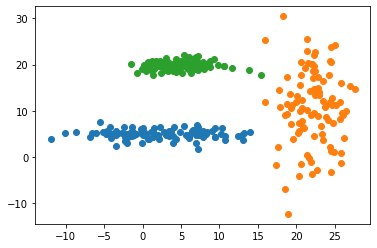

In [18]:
agglo = HierarchicalClustering(3)
agglo.fit(x_train)
agglo.plot_model()

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score, silhouette_samples


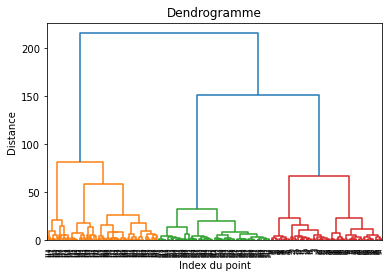

In [27]:
agglo.plot_dendrogram()

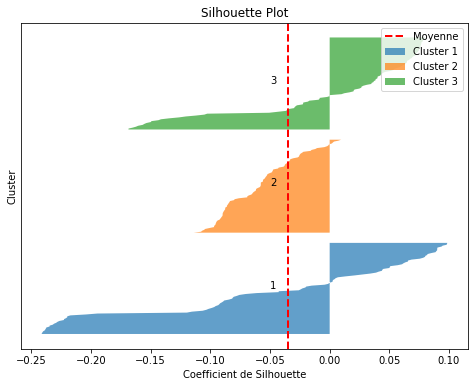

In [30]:
agglo.plot_silhouette(x_train)